# "Biodiversity in National Parks"
> "The objective of this project is to explore data of observations and conservation status of species found in various National Parks in the United States."
- toc: false
- branch: master
- badges: false
- comments: false
- image: images/conservation_status.png
- hide: false
- search_exclude: true
- sticky_rank: 5


## Introduction

The objective of this project is to explore data of observations and conservation status of species found in various National Parks in the United States.  This project will scope, analyze, prepare and clean, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for animal species in the National Parks?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status statistically significant?
- What is the frequency of reptile observations in the Parks in the last week?
- What proportion of these reptile species are protected based on conservation status?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

In [299]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from itertools import chain
import string
import re

#### species

The `species_info.csv` contains information on the different species in the National Parks.
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [300]:
species = pd.read_csv("species_info.csv")
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [301]:
observations = pd.read_csv("observations.csv")
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [302]:
print(f"Species Dataframe Shape: {species.shape}")
print(f"Observations Dataframe Shape: {observations.shape}")
print(f"Number of Species: {species.scientific_name.nunique()}")
print(f"Number of Species Categories: {species.category.nunique()}")
print(f"Species Categories: {species.category.unique()}")

Species Dataframe Shape: (5824, 4)
Observations Dataframe Shape: (23296, 3)
Number of Species: 5541
Number of Species Categories: 7
Species Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [303]:
animal_species = species[(species["category"] != "Vascular Plant") & (species["category"] != "Nonvascular Plant")].copy(deep=False)
print("Number of Species By Category:")
animal_species["category"].value_counts()

Number of Species By Category:


Bird         521
Mammal       214
Fish         127
Amphibian     80
Reptile       79
Name: category, dtype: int64

In [304]:
animal_species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [2]:
#collapse
import bokeh
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

Shape of your Data Set loaded: (23296, 3)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    2 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Multi_Classification VISUALIZATION Started #####################


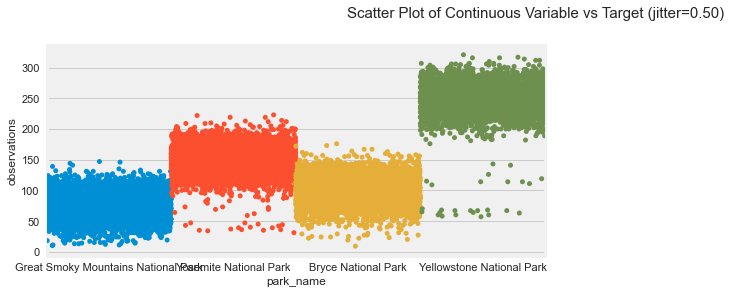

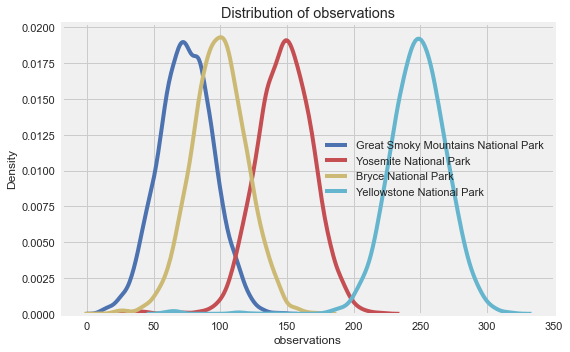

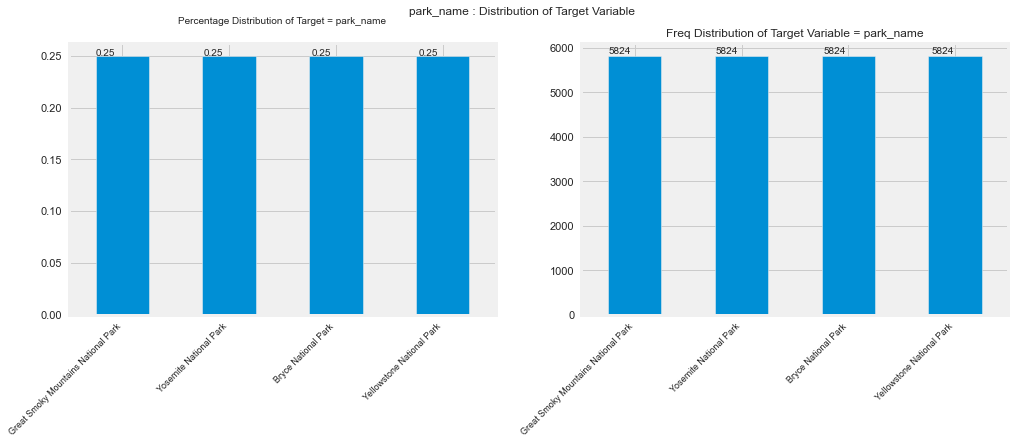

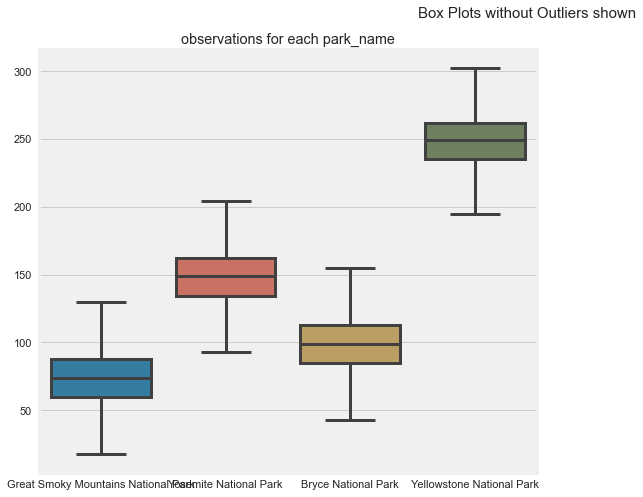

No categorical or boolean vars in data set. Hence no pivot plots...
No categorical or numeric vars in data set. Hence no bar charts.


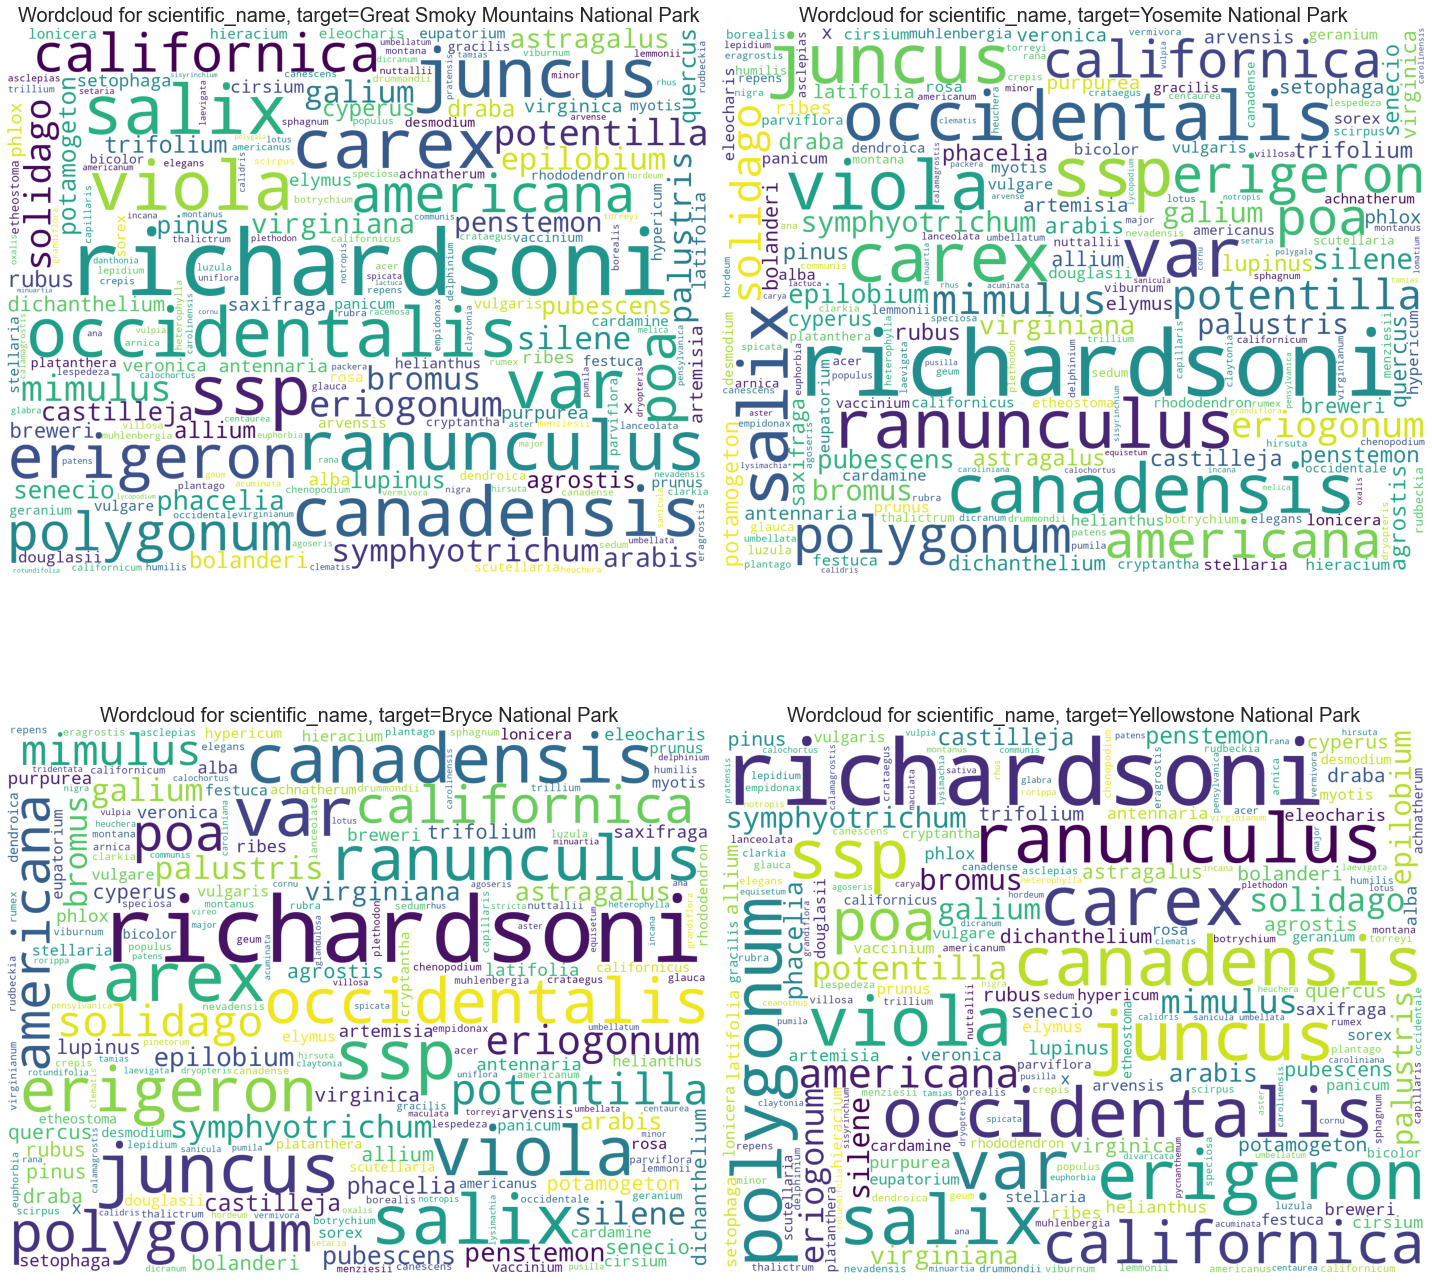

Time to run AutoViz = 40 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [5]:
#collapse_show
AV = AutoViz_Class()
target = "park_name"
sep=","
filename = "observations.csv"
dft = AV.AutoViz(filename, sep, target, "",
           header=0, verbose=0,
            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)

In [305]:
print(f"Number of Conservation Statuses: {animal_species.conservation_status.nunique()}")
print(f"Unique Conservation Statuses: {animal_species.conservation_status.unique()}")

Number of Conservation Statuses: 4
Unique Conservation Statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [306]:
print(f"NA values:{animal_species.conservation_status.isna().sum()}")
print(animal_species.groupby("conservation_status").size())

NA values:881
conservation_status
Endangered             15
In Recovery             4
Species of Concern    113
Threatened              8
dtype: int64


In [307]:
print(f"Number of Parks: {observations.park_name.nunique()}")
print(f"Park Names: {observations.park_name.unique()}")

Number of Parks: 4
Park Names: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [308]:
animal_species.fillna("Least Concern", inplace=True)
animal_species.groupby("conservation_status").size()

conservation_status
Endangered             15
In Recovery             4
Least Concern         881
Species of Concern    113
Threatened              8
dtype: int64

In [309]:
conservation = animal_species[animal_species["conservation_status"] != "Least Concern"]\
                        .groupby(["conservation_status", "category"])['scientific_name']\
                        .count()\
                        .unstack()
conservation

category,Amphibian,Bird,Fish,Mammal,Reptile
conservation_status,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN
In Recovery,NaN,3.0,NaN,1.0,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0
Threatened,2.0,NaN,4.0,2.0,NaN


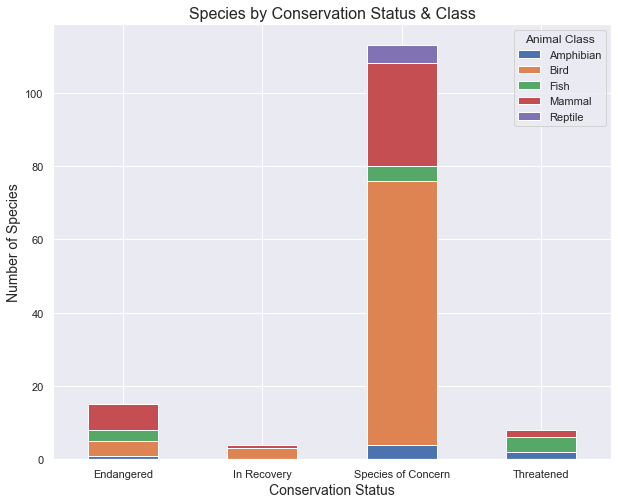

In [334]:
sns.set(style="darkgrid")
ax = conservation.plot(kind = "bar", figsize=(10,8), stacked=True)
ax.set_xlabel("Conservation Status", fontsize=14)
ax.set_ylabel("Number of Species", fontsize=14)
plt.title("Species by Conservation Status & Class", fontsize=16)
plt.legend(title="Animal Class", loc="upper right")
plt.xticks(rotation=0)
plt.show()
plt.savefig('conservation_status.png')

In [311]:
animal_species['protected'] = animal_species["conservation_status"] != 'Least Concern'
animal_species[5:10]

,category,scientific_name,common_names,conservation_status,protected
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Least Concern,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",Least Concern,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True


In [312]:
class_protected_counts = animal_species.groupby(['category', 'protected']).scientific_name.nunique()\
    .reset_index().pivot(columns='protected', index='category', values='scientific_name').reset_index()

class_protected_counts.columns = ['category', 'not_protected', 'protected']

class_protected_counts['percent_protected'] = class_protected_counts.protected / \
    (class_protected_counts.protected + class_protected_counts.not_protected) * 100

class_protected_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Reptile,73,5,6.410256


#### Statistical Significance

In [313]:
table = pd.crosstab(animal_species.protected, animal_species.category)
chi2, pval, dof, expected = chi2_contingency(table)
print(pval)

0.01788871996181953


The results from the chi-squared test gave a p-value of 0.018, which is below a significance threshold of 0.05. Therefore, it can be concluded that there is a significant relationship between the animal class and it's protected status.

#### Reptile Species in the National Parks 

In [314]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = animal_species[animal_species.category == "Reptile"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Eastern', 'Slender', 'Glass', 'Lizard'],
 ['Worm', 'Snakes', 'Wormsnakes'],
 ['Eastern', 'Worm', 'Snake'],
 ['Midwest', 'Worm', 'Snake'],
 ['Northern', 'Scarlet', 'Snake'],
 ['Northern', 'Black', 'Racer']]

In [315]:
cleanRows = []

for index in common_Names:
    index = list(dict.fromkeys(index))
    cleanRows.append(index)
    
cleanRows[:6]

[['Eastern', 'Slender', 'Glass', 'Lizard'],
 ['Worm', 'Snakes', 'Wormsnakes'],
 ['Eastern', 'Worm', 'Snake'],
 ['Midwest', 'Worm', 'Snake'],
 ['Northern', 'Scarlet', 'Snake'],
 ['Northern', 'Black', 'Racer']]

In [316]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Eastern', 'Slender', 'Glass', 'Lizard', 'Worm', 'Snakes']

In [317]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
14,Snake,27
65,Northern,15
7,Turtle,11
45,Eastern,11
88,Lizard,9
15,Skink,7
74,Kingsnake,6
23,Garter,5
21,Western,5
54,Racer,4


In [318]:
animal_species['snake'] = animal_species.common_names.str.contains(r"\bSnake\b", regex = True)
animal_species['lizard'] = animal_species.common_names.str.contains(r"\bLizard\b", regex = True)
animal_species['turtle'] = animal_species.common_names.str.contains(r"\bTurtle\b", regex = True)
animal_species[animal_species.turtle]

,category,scientific_name,common_names,conservation_status,protected,snake,lizard,turtle
399,Reptile,Chelydra serpentina serpentina,Common Snapping Turtle,Least Concern,False,False,False,True
400,Reptile,Chrysemys picta marginata,Midland Painted Turtle,Least Concern,False,False,False,True
401,Reptile,Chrysemys picta picta,Eastern Painted Turtle,Least Concern,False,False,False,True
402,Reptile,Clemmys muhlenbergii,Bog Turtle,Least Concern,False,False,False,True
403,Reptile,Graptemys geographica,"Common Map Turtle, Map Turtle",Least Concern,False,False,False,True
404,Reptile,Graptemys ouachitensis,Ouachita Map Turtle,Least Concern,False,False,False,True
405,Reptile,Terrapene carolina carolina,Eastern Box Turtle,Least Concern,False,False,False,True
408,Reptile,Sternotherus minor peltifer,"Stripeneck Musk Turtle, Stripe-Necked Musk Turtle",Least Concern,False,False,False,True
409,Reptile,Sternotherus odoratus,Common Musk Turtle,Least Concern,False,False,False,True
410,Reptile,Apalone spinifera spinifera,"Eastern Spiny Softshell, Northern Spiny Softsh...",Least Concern,False,False,False,True


In [319]:
snake_observations = observations.merge(animal_species[animal_species.snake])
lizard_observations = observations.merge(animal_species[animal_species.lizard])
turtle_observations = observations.merge(animal_species[animal_species.turtle])

In [320]:
park_snake_obs = snake_observations.groupby(["park_name","protected"]).observations.sum().reset_index()
park_lizard_obs = lizard_observations.groupby(["park_name","protected"]).observations.sum().reset_index()
park_turtle_obs = turtle_observations.groupby(["park_name","protected"]).observations.sum().reset_index()

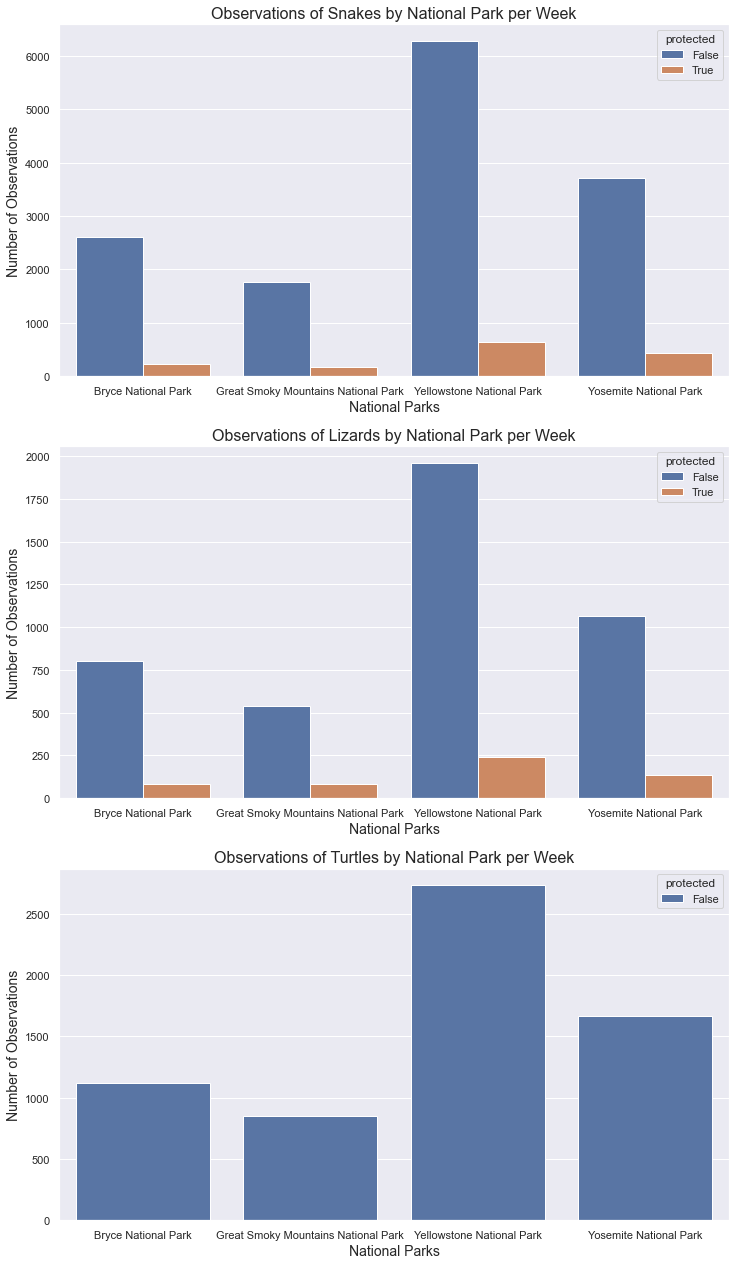

In [333]:
plt.figure(figsize=(12, 22))
ax1 = plt.subplot(3,1,1)
sns.barplot(x=park_snake_obs.park_name, y= park_snake_obs.observations, hue=park_snake_obs.protected)
plt.xlabel('National Parks', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.title('Observations of Snakes by National Park per Week', fontsize=16)

ax2 = plt.subplot(3,1,2)
sns.barplot(x=park_lizard_obs.park_name, y= park_lizard_obs.observations, hue=park_lizard_obs.protected)
plt.xlabel('National Parks', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.title('Observations of Lizards by National Park per Week', fontsize=16)

ax3 = plt.subplot(3,1,3)
sns.barplot(x=park_turtle_obs.park_name, y= park_turtle_obs.observations, hue=park_turtle_obs.protected)
plt.xlabel('National Parks', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.title('Observations of Turtles by National Park per Week', fontsize=16)
plt.show()

## Conclusions

The project was able to make several data visualizations and inferences about the various animal species in the four National Parks with data on observations.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for animal species?
    - The vast majority of species were not part of conservation.
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being protected as opposed to other animal classes.
- Are the differences between species and their conservation status significant?
    - After running a chi-squared statistical test, it was concluded that there is a significant difference between animal class and conservation status.